# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
from scipy.interpolate import interp1d

In [2]:
# Create dataframes for cases_train.csv and location.csv
df_ct = pd.read_csv('../data/cases_train.csv') 
df_ctp = pd.read_csv('../results/cases_train_processed.csv') 
df_l = pd.read_csv('../data/location.csv')

## Bar Chart

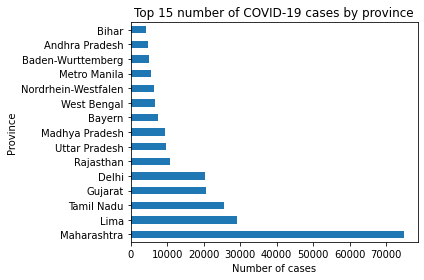

In [3]:
# top 15 number of COVID-19 cases by province
top_15_provinces = df_ct['province'].value_counts().head(15)
top_15_provinces.plot(
    title = 'Top 15 number of COVID-19 cases by province',
    kind = 'barh'
)

plt.xlabel('Number of cases')
plt.ylabel('Province')
plt.tight_layout()
# call savefig before show otherwise it will be a corrupt image
# plt.savefig('../plots/cases_by_province.pdf')
plt.show()

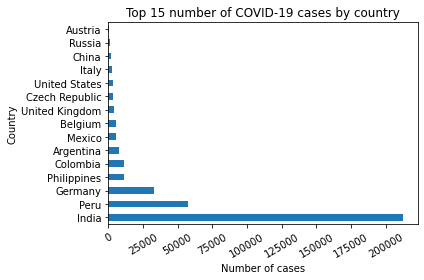

In [4]:
# top 15 number of COVID-19 cases by country
top_15_countries = df_ct['country'].value_counts().head(15)
top_15_countries.plot(
    title = 'Top 15 number of COVID-19 cases by country',
    kind = 'barh'
)

plt.xlabel('Number of cases')
plt.xticks(rotation = 30)
plt.ylabel('Country')
plt.tight_layout()
# plt.savefig('../plots/cases_by_country.pdf')
plt.show()

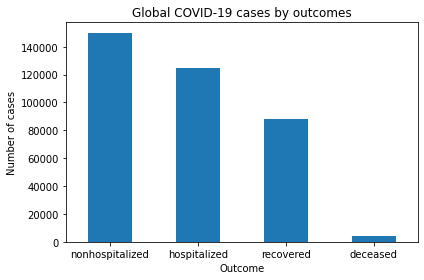

In [5]:
# Global COVID-19 cases by outcomes
outcomes = df_ct['outcome'].value_counts()
outcomes.plot(
    title = 'Global COVID-19 cases by outcomes',
    kind = 'bar'
)

plt.xlabel('Outcome')
plt.xticks(rotation = 0)
plt.ylabel('Number of cases')
plt.tight_layout()
# plt.savefig('../plots/cases_by_outcomes.pdf')
plt.show()

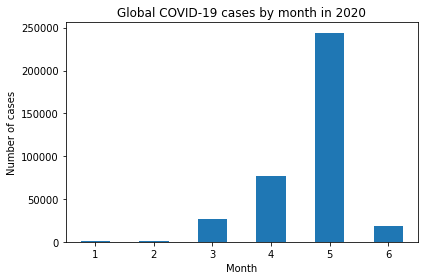

In [6]:
# Global COVID-19 cases by month confirmed in 2020
# removed the few dates that had ranges
date_confirmations = df_ct.date_confirmation[~df_ct['date_confirmation'].str.contains("-", na = False)]
date_confirmations = pd.to_datetime(date_confirmations, dayfirst = True)

month_confirmations = date_confirmations.dt.month.value_counts().sort_index()
month_confirmations.index = month_confirmations.index.astype(int)

month_confirmations.plot(
    title = 'Global COVID-19 cases by month in 2020',
    kind = 'bar'
)

plt.xlabel('Month')
plt.xticks(rotation = 0)
plt.ylabel('Number of cases')
plt.tight_layout()
# plt.savefig('../plots/cases_by_month.pdf')
plt.show()


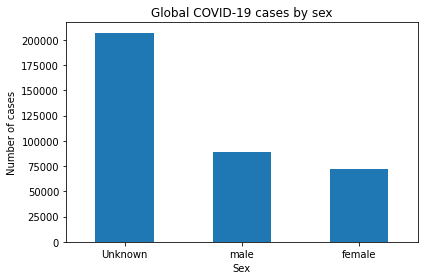

In [7]:
# Global COVID-19 cases by sex
# For sex we did not feel it made sense to predict the gender of each missing value, therefore left it as 'Unknown'
sexes = df_ctp['sex'].value_counts()
sexes.plot(
    title = 'Global COVID-19 cases by sex',
    kind = 'bar'
)

plt.xlabel('Sex')
plt.xticks(rotation = 0)
plt.ylabel('Number of cases')
plt.tight_layout()
# plt.savefig('../plots/cases_by_sex.pdf')
plt.show()

## Histogram

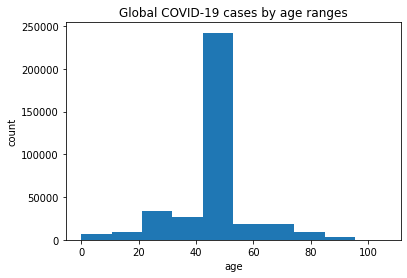

In [8]:
# Global COVID-19 cases by age ranges
fig = plt.hist(df_ctp['age'], bins=10)

plt.title('Global COVID-19 cases by age ranges')
plt.xlabel('age')
plt.ylabel('count')
# plt.savefig('../plots/cases_by_age.pdf')
plt.show()

## Heatmap

In [9]:
# Global COVID-19 heatmap by cases
countries = df_ct['country'].value_counts()
cases_list = countries.tolist()

# interpolating circle radius' to given circle range
m = interp1d([1, max(cases_list)], [5, 20])
circle_radius = m(cases_list)

fig = px.density_mapbox(
    df_ct, 
    lat='latitude', 
    lon='longitude', 
    radius=circle_radius, 
    zoom=0, 
    mapbox_style='open-street-map', 
    title='Global COVID-19 heatmap by cases'
)
# fig.show()

## Missing Data (cases_train.csv)

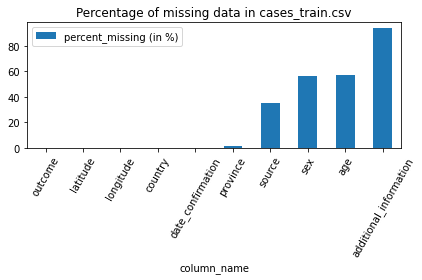

In [10]:
# Percentage of missing data from cases_train.csv
percent_missing = df_ct.isnull().sum() * 100 / len(df_ct)
missing_values = pd.DataFrame({
    'column_name': df_ct.columns,
    'percent_missing': percent_missing
})
missing_values.sort_values('percent_missing', inplace=True)

missing_values.plot(
    title = 'Percentage of missing data in cases_train.csv',
    kind = 'bar',
    x = 'column_name',
    y = 'percent_missing'
)

plt.xticks(rotation = 60)
plt.tight_layout()
plt.legend().get_texts()[0].set_text('percent_missing (in %)')
# plt.savefig('../plots/missing_data_cases_train.pdf')
plt.show()


## Missing Data (location.csv)

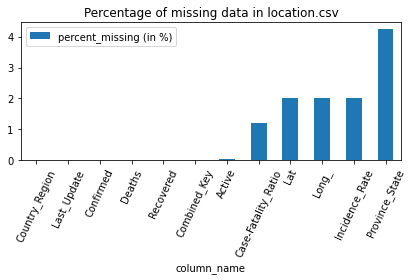

In [11]:
# Percentage of missing data from cases_train.csv
percent_missing = df_l.isnull().sum() * 100 / len(df_l)
missing_values = pd.DataFrame({
    'column_name': df_l.columns,
    'percent_missing': percent_missing
})
missing_values.sort_values('percent_missing', inplace=True)

missing_values.plot(
    title = 'Percentage of missing data in location.csv',
    kind = 'bar',
    x = 'column_name',
    y = 'percent_missing'
)

plt.xticks(rotation = 65)
plt.tight_layout()
plt.legend().get_texts()[0].set_text('percent_missing (in %)')
# plt.savefig('../plots/missing_data_location.pdf')
plt.show()